# Лабораторная работа №5
-----------------------
**Кластеризация (k-средних, иерархическая)**

----------------------- 

## Цель:
Ознакомиться с методами кластеризации модуля Sklearn

## Выполнение

### imports

In [100]:
import pandas as pd
import numpy  as np

from sklearn.cluster          import KMeans, MiniBatchKMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.cluster.hierarchy  import dendrogram
from sklearn.decomposition    import PCA

import matplotlib.pyplot as plt

import random
import math

### Загрузка данных

In [101]:
data = pd.read_csv('iris.data',header=None)
labels = data[4]
data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


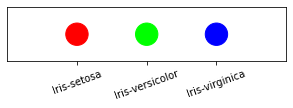

In [102]:
unique_labels = labels.unique()
iris_colors = ["#FF0000", "#00FF00", "#0000FF"]

plt.figure(figsize=(5, 1))
plt.xlim(0, 4)
plt.tick_params(left=False, labelleft=False)
plt.scatter([1, 2, 3], [0, 0, 0,], s=500, c=iris_colors)
plt.xticks([1, 2, 3], unique_labels, rotation=20)
plt.show()


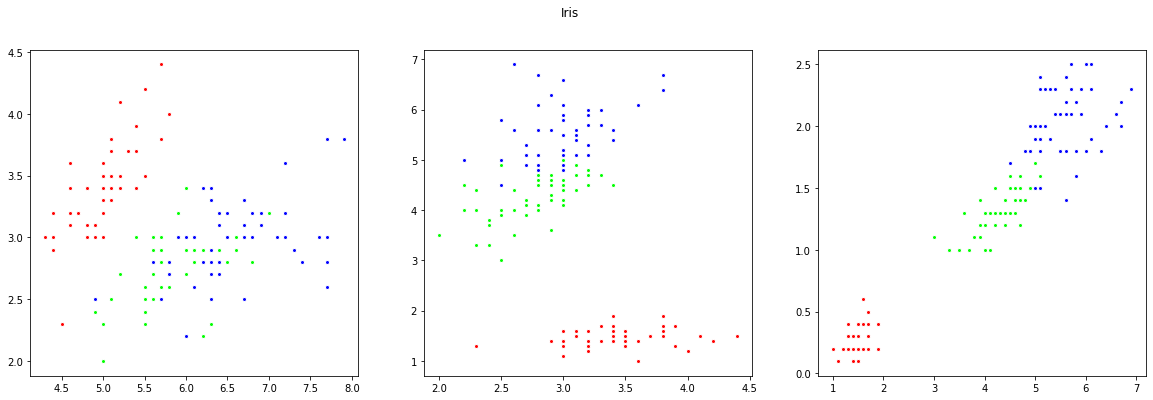

In [103]:
no_labeled_data = data.drop(4, axis = 1)
no_labeled_data

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Iris")

for i in range(len(unique_labels)):
    my_members = labels == unique_labels[i]
    for j in range(3):
        axs[j].plot(
            no_labeled_data.to_numpy()[my_members, j],
            no_labeled_data.to_numpy()[my_members, j+1],
            linestyle="None",
            markerfacecolor=iris_colors[i],
            markeredgecolor="w",
            marker='o', markersize=4
        )

plt.show()


### K-means

In [104]:
def plot_kmeans(k_means, np_data, title):
    k_means_cluster_centers = k_means.cluster_centers_
    k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(title)
    colors = ['#4EACC5', '#FF9C34', '#4E9A06']
    iris_colors = ["#FF0000", "#00FF00", "#0000FF"]

    for i in range(3):
        my_members = k_means_labels == i
        cluster_center = k_means_cluster_centers[i]
        for j in range(3):
            axs[j].plot(
                np_data[my_members, j],
                np_data[my_members, j+1], linestyle="None",
                markerfacecolor=colors[i],
                markeredgecolor="w",
                marker='o', markersize=4
            )

            axs[j].plot(
                cluster_center[j],
                cluster_center[j+1], 'o',
                markerfacecolor=colors[i],
                markeredgecolor='k', markersize=8
            )

    plt.show()

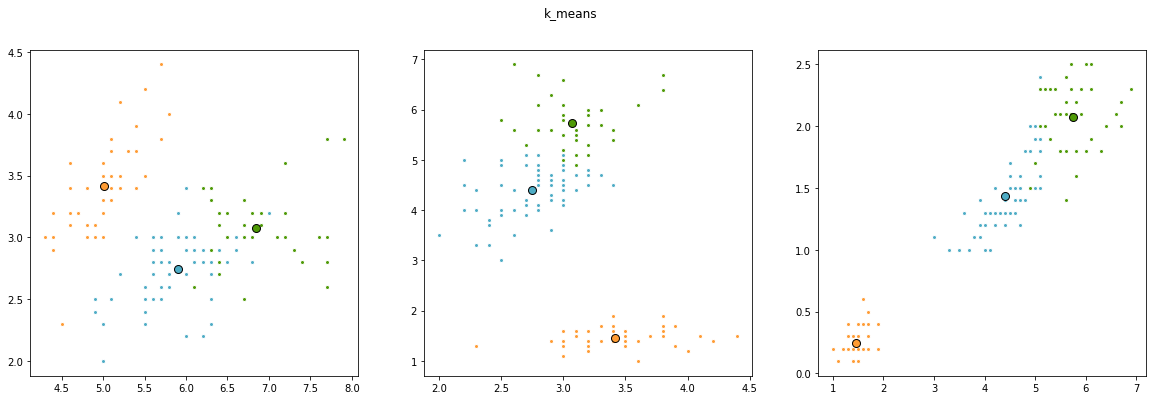

In [105]:
k_means = KMeans(init="k-means++", n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)

plot_kmeans(k_means, no_labeled_data.to_numpy(), "k_means")

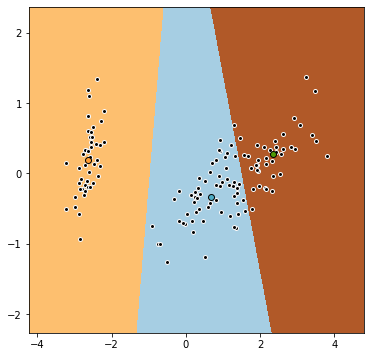

In [133]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(no_labeled_data)

k_means_reduced = KMeans(init="k-means++", n_clusters=3)
k_means_reduced.fit_transform(reduced_data)
k_means_reduced_labels = pairwise_distances_argmin(reduced_data, k_means_reduced.cluster_centers_)

colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .005     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = k_means_reduced.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(6, 6))
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

for i in range(3):
    members = k_means_reduced_labels == i
    cluster_center = k_means_reduced.cluster_centers_[i]
    plt.plot(
        reduced_data[members, 0],
        reduced_data[members, 1], 'w',
        linestyle="None", markerfacecolor="k", marker='o', markersize=4
    )
    plt.plot(cluster_center[0], cluster_center[1], 'o',
        markerfacecolor=colors[i],
        markeredgecolor='k', markersize=6
    )
plt.show()
    

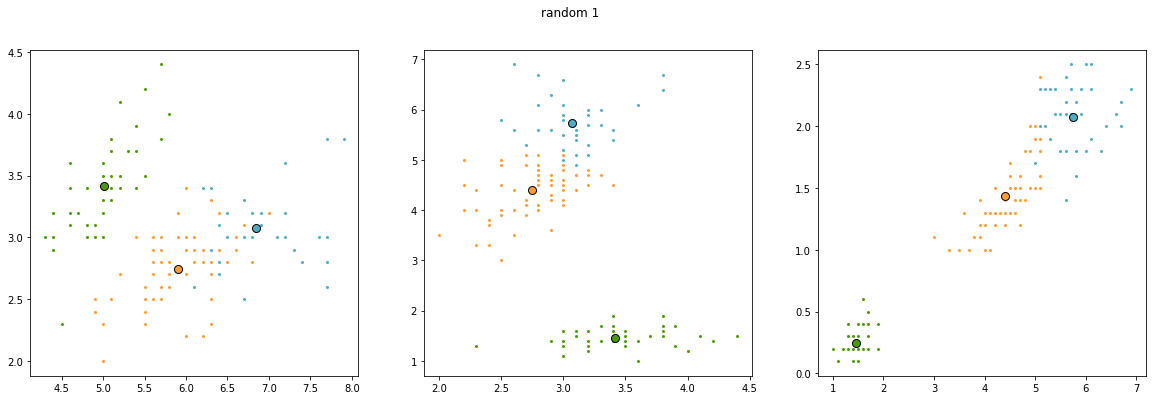

In [107]:
k_means_r1 = KMeans(init="random", n_clusters=3).fit(no_labeled_data)
plot_kmeans(k_means_r1, no_labeled_data.to_numpy(), "random 1")

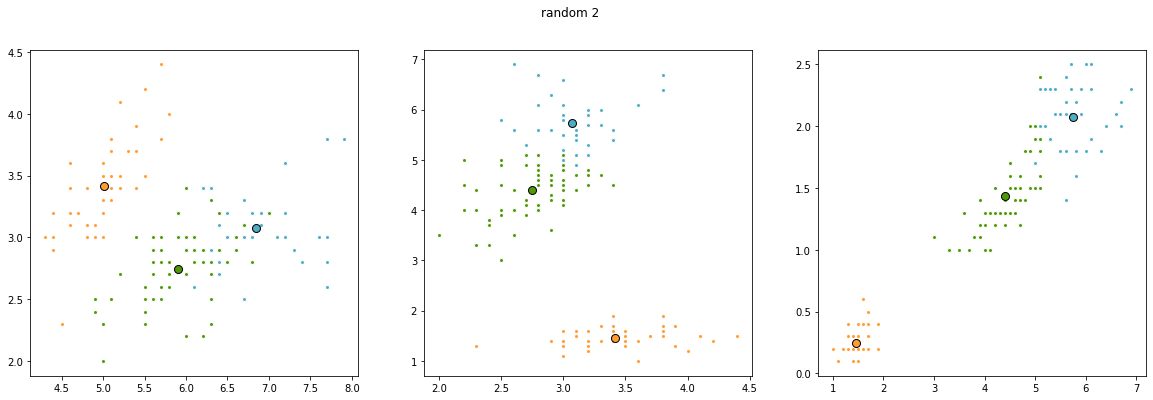

In [108]:
k_means_r1 = KMeans(init="random", n_clusters=3).fit(no_labeled_data)
plot_kmeans(k_means_r1, no_labeled_data.to_numpy(), "random 2")

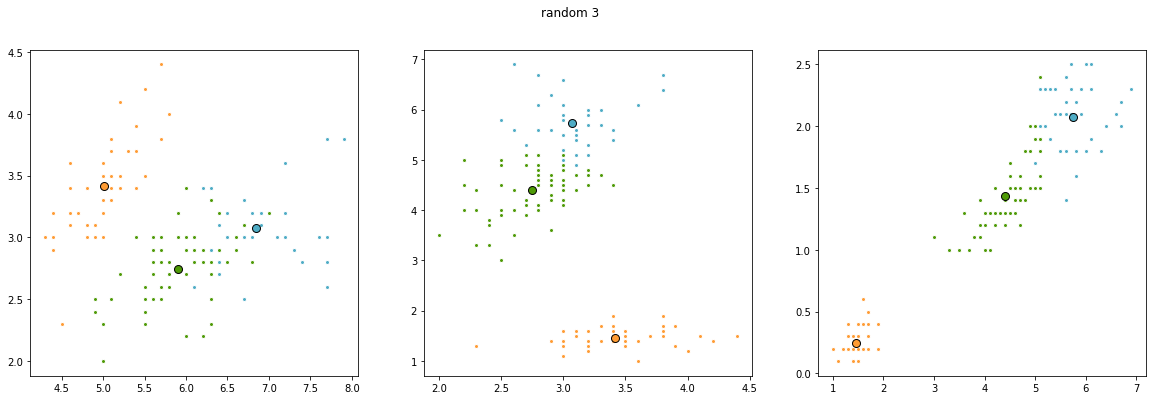

In [109]:
k_means_r1 = KMeans(init="random", n_clusters=3).fit(no_labeled_data)
plot_kmeans(k_means_r1, no_labeled_data.to_numpy(), "random 3")

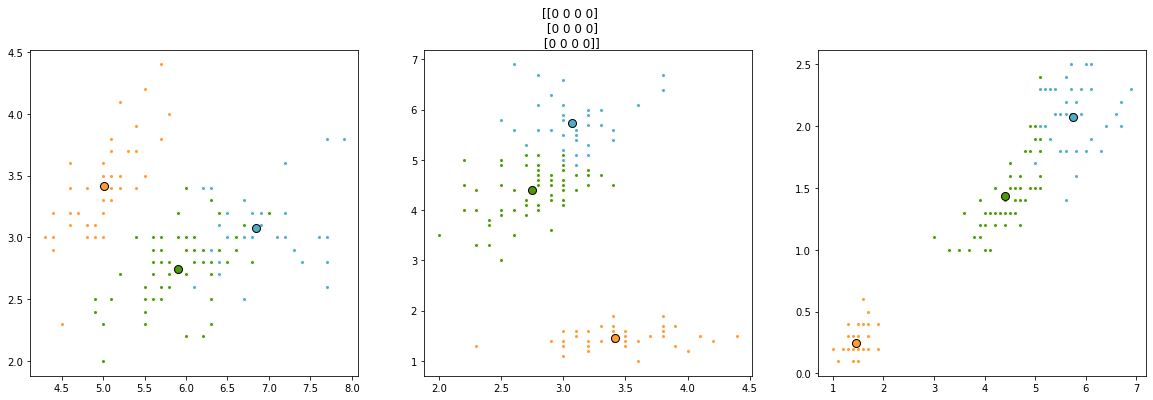

In [110]:
init_1 = np.array([[0, 0,    0, 0   ], [0, 0,    0, 0   ], [0, 0,    0, 0   ]])
init_2 = np.array([[6, 3.25, 4, 1.25], [6, 3.25, 4, 1.25], [6, 3.25, 4, 1.25]])
init_3 = np.array([[1, 2,    3, 4   ], [4, 3,    2, 1   ], [2, 1,    1, 2   ]])

k_means_l1 = KMeans(init=init_1, n_clusters=3, n_init=1).fit(no_labeled_data)
plot_kmeans(k_means_r1, no_labeled_data.to_numpy(), np.array2string(init_1))

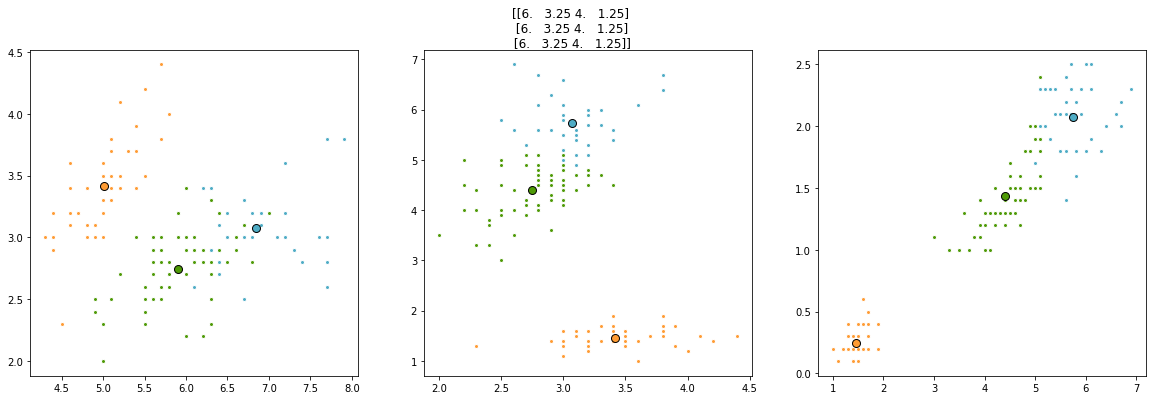

In [111]:
k_means_l2 = KMeans(init=init_2, n_clusters=3, n_init=1).fit(no_labeled_data)
plot_kmeans(k_means_r1, no_labeled_data.to_numpy(), np.array2string(init_2))

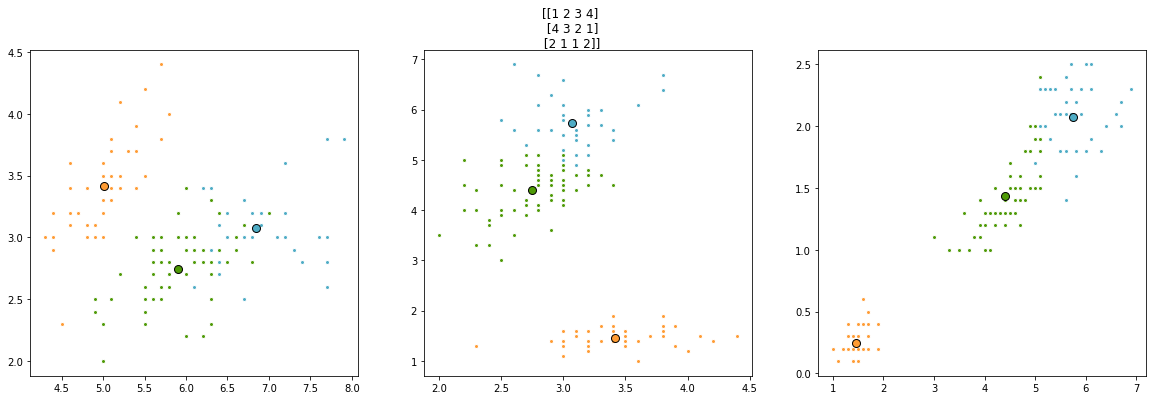

In [112]:
k_means_l3 = KMeans(init=init_3, n_clusters=3, n_init=1).fit(no_labeled_data)
plot_kmeans(k_means_r1, no_labeled_data.to_numpy(), np.array2string(init_3))

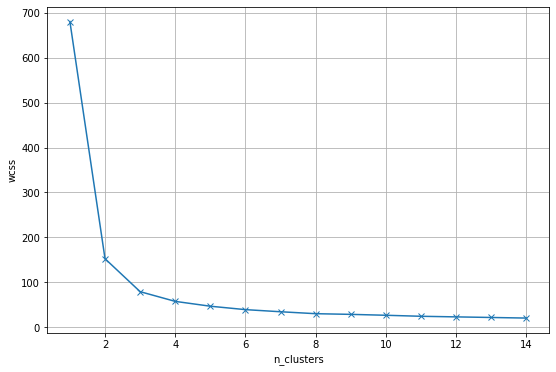

In [113]:
wcss=[]
for i in range(1,15):
    kmean = KMeans(n_clusters=i,init="k-means++")
    kmean.fit_predict(no_labeled_data)
    wcss.append(kmean.inertia_)

plt.figure(figsize=(9, 6))
plt.plot(range(1,15), wcss, marker='x')
plt.xlabel("n_clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()

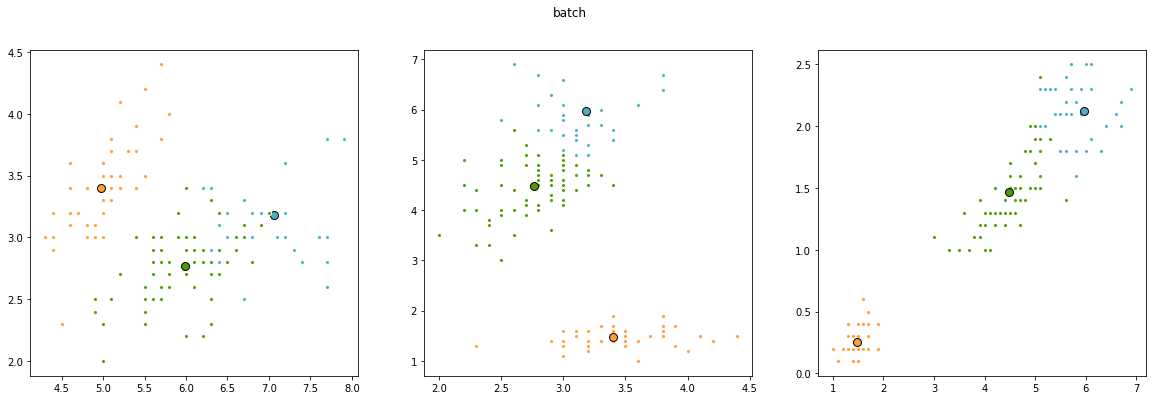

In [148]:
k_means_batch = MiniBatchKMeans(n_clusters=3, batch_size=10, n_init=1)
k_means_batch.fit(no_labeled_data)

plot_kmeans(k_means_batch, no_labeled_data.to_numpy(), "batch")

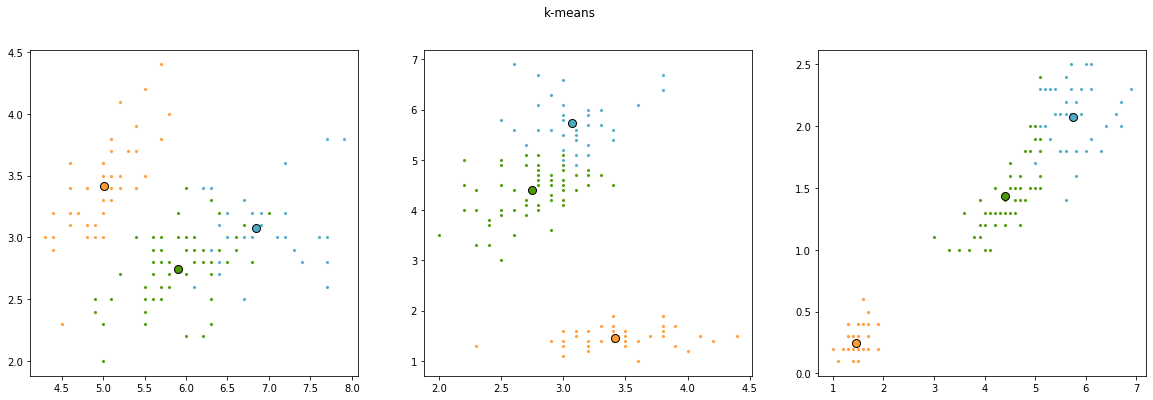

In [142]:
k_means = KMeans(init="k-means++", n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)
plot_kmeans(k_means, no_labeled_data.to_numpy(), "k-means")

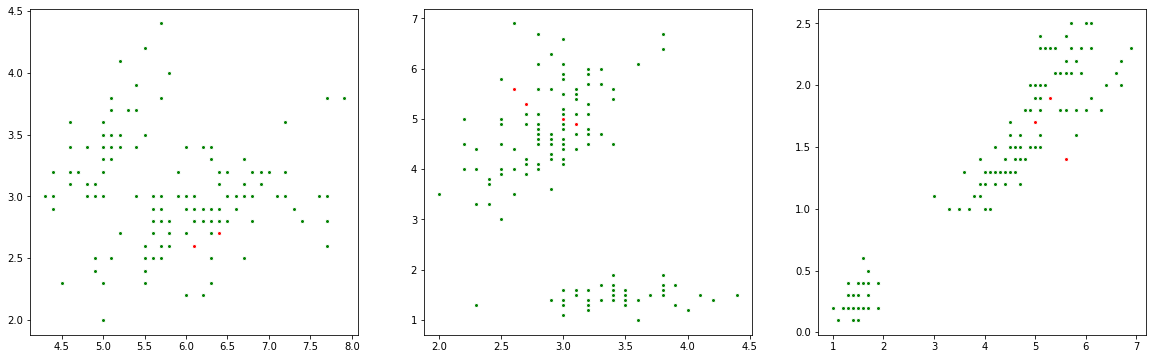

In [149]:
diff = np.array([k_means_label != k_means_batch_label for k_means_label, k_means_batch_label in zip(k_means.labels_, k_means_batch.labels_)])

_, axs = plt.subplots(1, 3, figsize=(20, 6))
for j in range(3):
    axs[j].plot(no_labeled_data[diff][j], no_labeled_data[diff][j+1], linestyle="None", markeredgecolor="w", markerfacecolor='r', marker='o', markersize=4, lw=0)
    axs[j].plot(no_labeled_data[~diff][j], no_labeled_data[~diff][j+1], linestyle="None", markeredgecolor="w", markerfacecolor='g', marker='o', markersize=4, lw=0)
plt.show()

### Иерархическая кластеризация

In [152]:
def clustering(n_clusters):
    hier = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    hier = hier.fit(no_labeled_data)
    hier_labels = hier.labels_

    _, axs = plt.subplots(1, 3, figsize=(20, 6))
    colors = ['#4EACC5', '#FF9C34', '#4E9A06', "#AC39AC", "#E62E00"]

    for i in range(n_clusters):
        my_members = hier_labels == i
        for j in range(3):
            axs[j].plot(
                no_labeled_data.to_numpy()[my_members, j],
                no_labeled_data.to_numpy()[my_members, j+1], linestyle="None",
                markeredgecolor="w",
                markerfacecolor=colors[i], marker='o', markersize=4
            )

    plt.show()

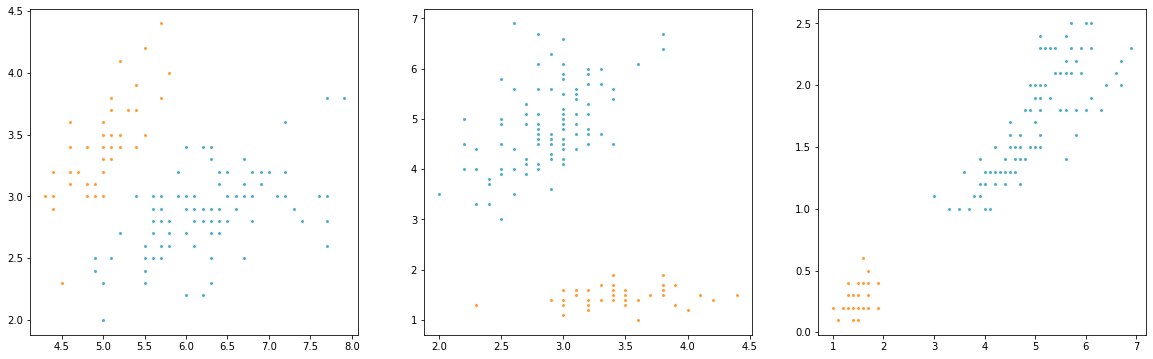

In [153]:
clustering(2)

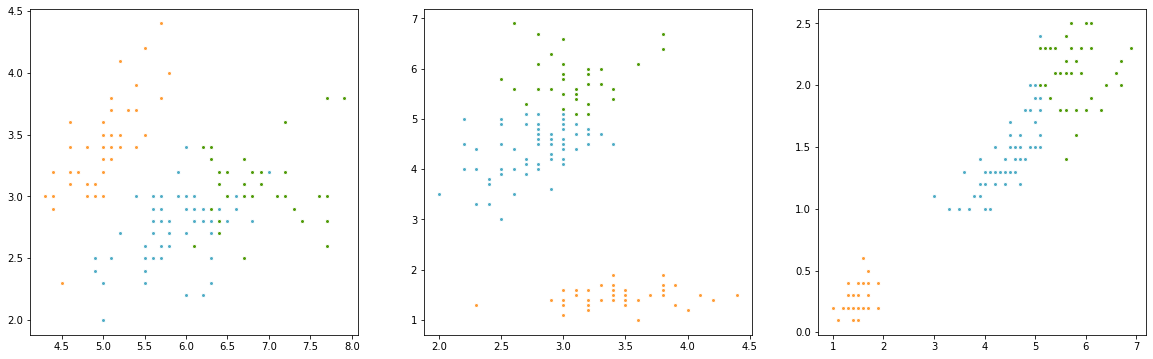

In [156]:
clustering(3)

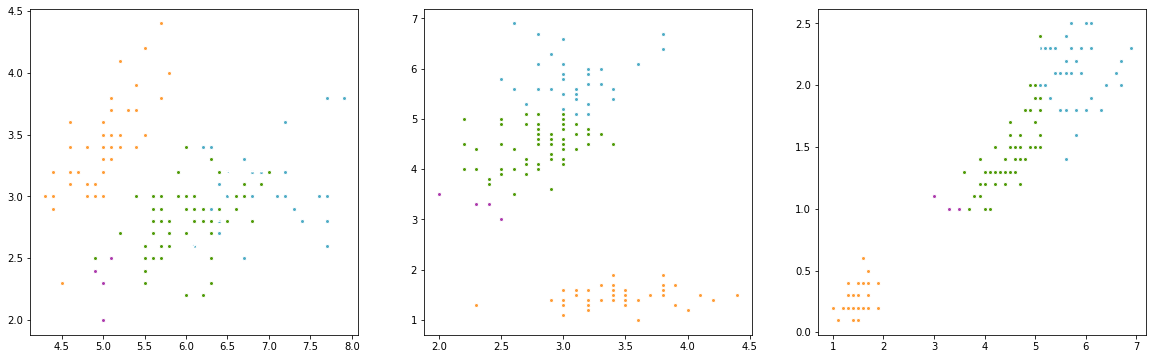

In [120]:
clustering(4)

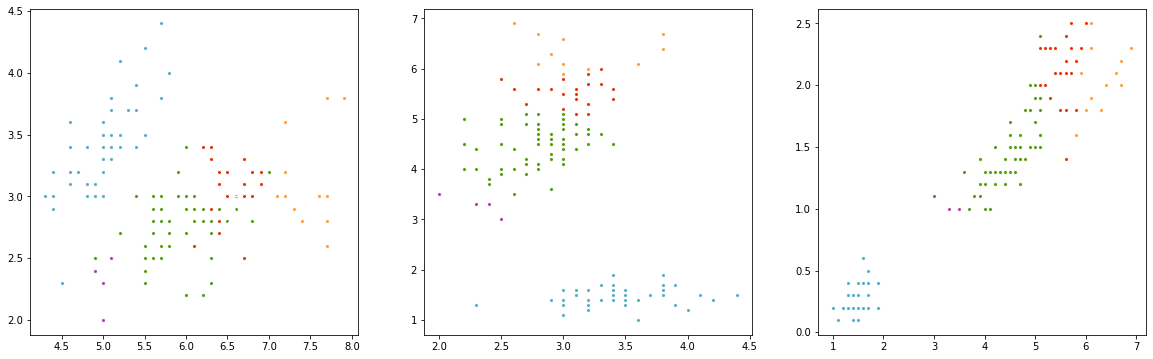

In [121]:
clustering(5)

In [122]:
def plot_dendogramm(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

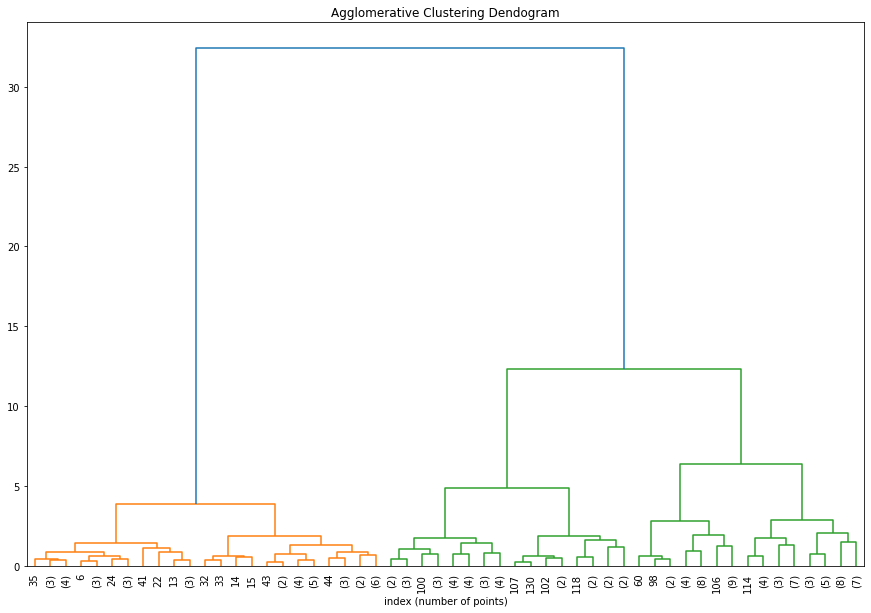

In [123]:
plt.figure(figsize=(15, 10))
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(no_labeled_data)
plt.title("Agglomerative Clustering Dendogram")
plot_dendogramm(model, truncate_mode="level", p=5)
plt.xlabel("index (number of points)")
plt.xticks(fontsize=10)

plt.show()

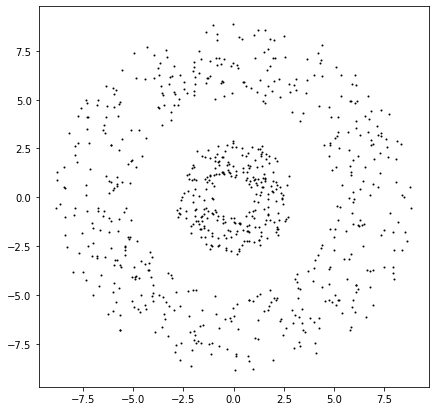

In [168]:
data1 = np.zeros([250,2])
for i in range(250):
    r = random.uniform(1, 3)
    a = random.uniform(0, 2 * math.pi)
    data1[i,0] = r * math.sin(a)
    data1[i,1] = r * math.cos(a)

data2 = np.zeros([500,2])
for i in range(500):
    r = random.uniform(5, 9)
    a = random.uniform(0, 2 * math.pi)
    data2[i,0] = r * math.sin(a)
    data2[i,1] = r * math.cos(a)

data = np.vstack((data1, data2))

plt.figure(figsize=(7, 7))
plt.plot(
    data[:, 0],
    data[:, 1],
    linestyle="None",
    markeredgecolor="k",
    markerfacecolor="k", marker='o', markersize=1
)
plt.show()


In [126]:
def analyze_linkage(data, linkage, axs):
    hier = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    hier = hier.fit(data)
    hier_labels = hier.labels_

    axs.set_title(linkage)

    my_members = hier_labels == 0
    axs.plot(
        data[my_members, 0],
        data[my_members, 1],
        marker='o',
        markersize=4,
        color='red',
        linestyle='None'
    )

    my_members = hier_labels == 1
    axs.plot(
        data[my_members, 0],
        data[my_members, 1], 
        marker='o',
        markersize=4,
        color='blue',
        linestyle='None'
    )

    

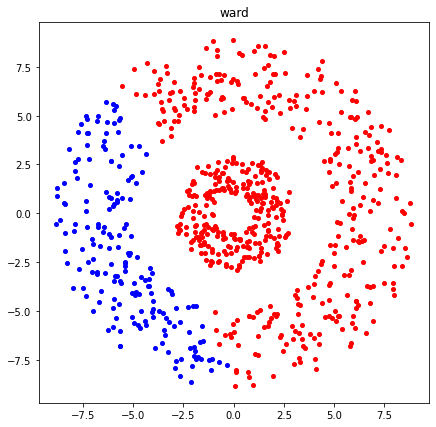

In [172]:
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
analyze_linkage(data, "ward", axs)
plt.show()

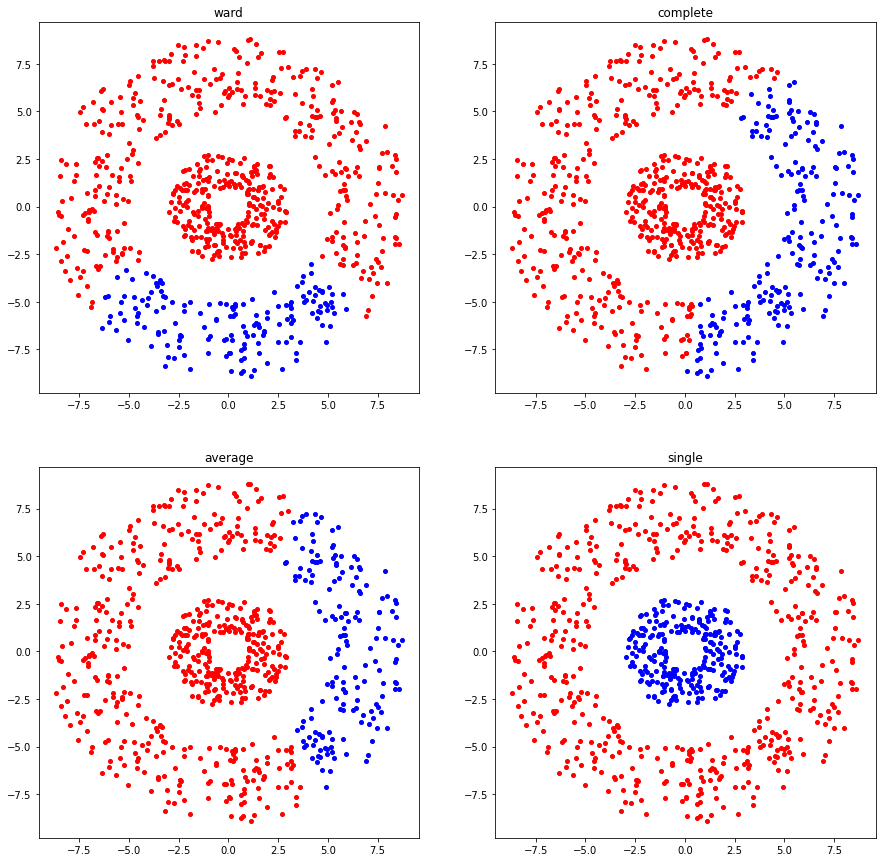

In [127]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
analyze_linkage(data, "ward", axs[0][0])
analyze_linkage(data, "average", axs[1][0])
analyze_linkage(data, "complete", axs[0][1])
analyze_linkage(data, "single", axs[1][1])
plt.show()